# Finding the Best Markets to Advertise In

Let's assume that we're working for an an e-learning company that offers courses on programming. Most of our courses are on web and mobile development, but we also cover many other domains, like data science, game development, etc. We want to promote our product and we'd like to invest some money in advertisement. Our goal in this project is to find out the two best markets to advertise our product in.

We will analyse the freeCodeCamp's 2017 New Coder Survey to find the best markets to advertise in.

In [21]:
import pandas as pd

# Load the dataset
file_path = '2017-fCC-New-Coders-Survey-Data.csv'
data = pd.read_csv(file_path, low_memory = 0)
print(data.shape)
data.head()

(18175, 136)


,Age,AttendedBootcamp,BootcampFinish,BootcampLoanYesNo,BootcampName,BootcampRecommend,ChildrenNumber,CityPopulation,CodeEventConferences,CodeEventDjangoGirls,...,YouTubeFCC,YouTubeFunFunFunction,YouTubeGoogleDev,YouTubeLearnCode,YouTubeLevelUpTuts,YouTubeMIT,YouTubeMozillaHacks,YouTubeOther,YouTubeSimplilearn,YouTubeTheNewBoston
0,27.0,0.0,NaN,NaN,NaN,NaN,NaN,more than 1 million,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,34.0,0.0,NaN,NaN,NaN,NaN,NaN,"less than 100,000",NaN,NaN,...,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,21.0,0.0,NaN,NaN,NaN,NaN,NaN,more than 1 million,NaN,NaN,...,NaN,NaN,NaN,1.0,1.0,NaN,NaN,NaN,NaN,NaN
3,26.0,0.0,NaN,NaN,NaN,NaN,NaN,"between 100,000 and 1 million",NaN,NaN,...,1.0,1.0,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN
4,20.0,0.0,NaN,NaN,NaN,NaN,NaN,"between 100,000 and 1 million",NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Each column appears to describe different facets of the survey participants' backgrounds, coding experience, learning methods, job preferences, and financial situations. This dataset seems particularly useful for analyzing trends and patterns among new coders, especially in terms of their learning preferences and career aspirations. 

# Checking for Sample Representativity

In [22]:
# Generating a frequency distribution table for the 'JobRoleInterest' column
job_interests = data['JobRoleInterest'].dropna()
split_interests = job_interests.str.split(',')

# Flattening the list of lists into a single list of interests
all_interests = []
for interests in split_interests:
    for interest in interests:
        all_interests.append(interest.strip())

# Converting to a Series to use value_counts method
interest_series = pd.Series(all_interests)
frequency_table = interest_series.value_counts(normalize=True) * 100

frequency_table.head(10)  # Displaying the top 10 interests for brevity

Full-Stack Web Developer    18.575221
Front-End Web Developer     15.632743
Back-End Web Developer      12.265487
Mobile Developer            10.194690
Data Scientist               7.269912
Game Developer               7.203540
User Experience Designer     6.500000
Information Security         5.867257
Data Engineer                5.522124
DevOps / SysAdmin            4.101770
dtype: float64

Full-stack, front-end, and back-end web development roles are the most popular, cumulatively accounting for over 46% of interests. This indicates a strong trend towards web development among new coders.

Mobile development and data science (including data engineering) also feature prominently, highlighting interest in these growing fields.

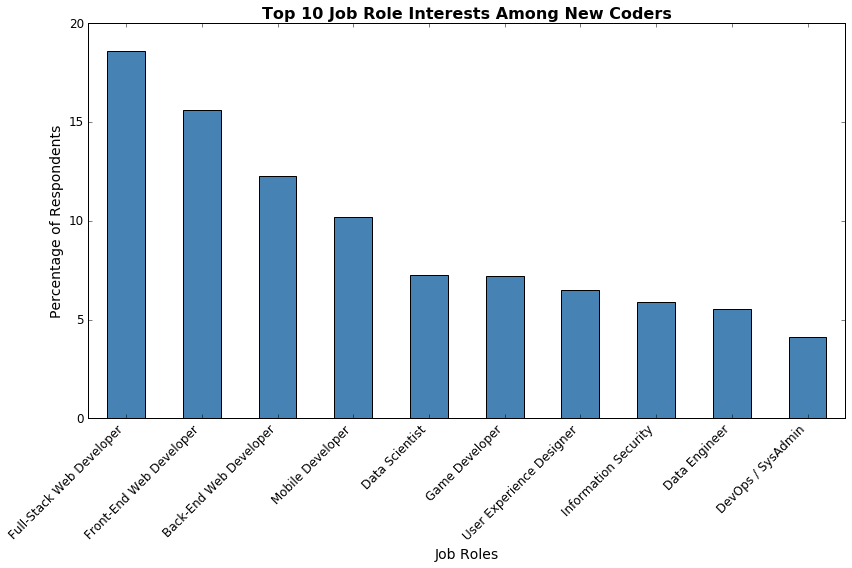

In [28]:
# Correcting the provided code for the bar plot

plt.figure(figsize=(12, 8))
ax = top_10_interests.plot(kind='bar', color='steelblue', edgecolor='black')

# Adding titles and labels
plt.title('Top 10 Job Role Interests Among New Coders', fontsize=16, fontweight='bold')
plt.ylabel('Percentage of Respondents', fontsize=14)
plt.xlabel('Job Roles', fontsize=14)
plt.xticks(rotation=45, ha='right', fontsize=12)
plt.yticks(fontsize=12)

plt.tight_layout()
plt.show()

Here is a bar plot visualizing the top 10 job role interests among new coders, with percentages indicating the proportion of respondents interested in each role. This visualization clearly highlights the popularity of various roles, with web development roles dominating the chart.

# New Coders - Locations and Densities

Now that we found the the sample has the right people for our purpose, we can begin analyzing. First we will start by finding out where these new coders are location using the CountryLive variable.

First we will drop all the rows where participants didn't know what role they are interested in.

In [29]:
# Dropping rows where the 'JobRoleInterest' is null (participants don't know their role interest)
data_cleaned = data.dropna(subset=['JobRoleInterest'])

# Checking the new shape of the dataset after dropping the rows
new_num_rows, _ = data_cleaned.shape
new_num_rows

6992

Now we will generate a frequency table for the CountryLive variable.

In [31]:
# Generating a frequency table for the 'CountryLive' variable in the cleaned dataset
country_live_freq_table = data_cleaned['CountryLive'].value_counts()
country_live_freq_table_relative = data_cleaned['CountryLive'].value_counts(normalize=True) * 100

# Displaying the top 5 countries in both absolute and relative terms for analysis
top_5_countries_absolute = country_live_freq_table.head(5)
top_5_countries_relative = country_live_freq_table_relative.head(5)

top_5_countries_absolute, top_5_countries_relative

(United States of America    3125
 India                        528
 United Kingdom               315
 Canada                       260
 Poland                       131
 Name: CountryLive, dtype: int64, United States of America    45.700497
 India                        7.721556
 United Kingdom               4.606610
 Canada                       3.802281
 Poland                       1.915765
 Name: CountryLive, dtype: float64)

The United States stands out significantly, with nearly 46% of participants residing there, making it a primary market for advertising.

India, with 7.72%, is the second-largest market. This is a considerable percentage, especially considering the large population and growing tech industry in India.

# Spending Money for Learning

We found useful information about the location of new coders but we also need to go more in depth. We can continue by finding out how much money new coders are actually willing to spend on learning.

In [33]:
# Replacing 0 months with 1 in 'MonthsProgramming' to avoid division by zero
data_cleaned['MonthsProgramming'].replace(0, 1, inplace=True)

# Calculating the amount of money a student has spent per month
data_cleaned['MoneyPerMonth'] = data_cleaned['MoneyForLearning'] / data_cleaned['MonthsProgramming']

# Counting null values in the new 'MoneyPerMonth' column
null_money_per_month = data_cleaned['MoneyPerMonth'].isnull().sum()

# Keeping only the rows without null values in 'MoneyPerMonth' and 'CountryLive'
data_filtered = data_cleaned.dropna(subset=['MoneyPerMonth', 'CountryLive'])

# Grouping the data by 'CountryLive' and calculating the mean money spent per month
countries_of_interest = ['United States of America', 'India', 'United Kingdom', 'Canada']
average_spending = data_filtered[data_filtered['CountryLive'].isin(countries_of_interest)]
average_spending_grouped = average_spending.groupby('CountryLive')['MoneyPerMonth'].mean()

average_spending_grouped

/dataquest/system/env/python3/lib/python3.4/site-packages/pandas/core/generic.py:4619: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy

/dataquest/system/env/python3/lib/python3.4/site-packages/ipykernel/__main__.py:5: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy



CountryLive
Canada                      113.510961
India                       135.100982
United Kingdom               45.534443
United States of America    227.997996
Name: MoneyPerMonth, dtype: float64

Students in the US appear to spend the most per month on learning, which could be influenced by higher course fees or a greater propensity to enroll in paid programs.

The average spending in India is notably higher than in the UK and Canada. This could be due to a variety of factors, such as the inclusion of expensive bootcamp fees.

The UK and Canada show relatively lower average spending. This might reflect either a difference in the cost of learning resources or a tendency to use more free or low-cost learning materials.
Points to Consider:

The higher spending in India seems unusual given the general economic differences compared to the US, UK, and Canada. It's possible that a few big spenders are skewing the average upwards.

# Dealing with Extreme Outliers

/dataquest/system/env/python3/lib/python3.4/site-packages/seaborn/categorical.py:454: FutureWarning:

remove_na is deprecated and is a private function. Do not use.



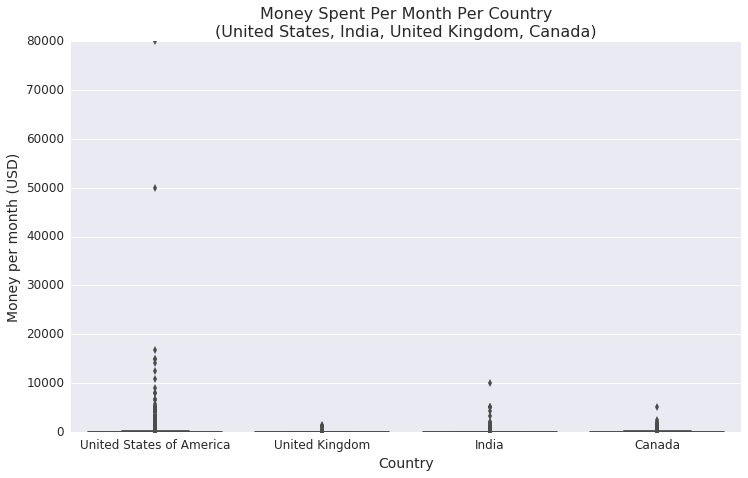

In [34]:
import seaborn as sns

# Filtering data for the countries of interest
countries_data = average_spending[average_spending['CountryLive'].isin(countries_of_interest)]

# Creating box plots
plt.figure(figsize=(12, 7))
sns.boxplot(x='CountryLive', y='MoneyPerMonth', data=countries_data)
plt.title('Money Spent Per Month Per Country\n(United States, India, United Kingdom, Canada)', fontsize=16)
plt.ylabel('Money per month (USD)', fontsize=14)
plt.xlabel('Country', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

There's a wide range of spending, with several extreme outliers indicating that some participants spend significantly more per month.

Similar to the US, India also shows a wide range and some extreme outliers.

The UK shows a more compact distribution with a few outliers.
Canada: Canada's distribution is somewhat similar to the UK, with a few outliers.

These distributions suggest varying spending behaviors across these countries, with notable outliers in the US and India potentially skewing the average spending figures. 

In [36]:
# Isolating the countries of interest for further outlier analysis
countries_data_further_analysis = average_spending[average_spending['CountryLive'].isin(countries_of_interest)]

# Removing extreme outliers
# Setting a higher threshold for considering an observation as an outlier
# For this, let's use a threshold of $2000 per month

extreme_outlier_threshold = 2000
countries_data_no_extreme = countries_data_further_analysis[countries_data_further_analysis['MoneyPerMonth'] < extreme_outlier_threshold]

# Recomputing the mean values after removing extreme outliers
mean_spending_no_extreme = countries_data_no_extreme.groupby('CountryLive')['MoneyPerMonth'].mean()

# Checking for specific extreme cases in India
india_outliers = countries_data_no_extreme[(countries_data_no_extreme['CountryLive'] == 'India') & 
                                           (countries_data_no_extreme['MoneyPerMonth'] >= 2000)]

# Investigating if these outliers attended any bootcamp
india_outliers_bootcamp = india_outliers[['AttendedBootcamp', 'MoneyPerMonth', 'MonthsProgramming']]

mean_spending_no_extreme, india_outliers_bootcamp

(CountryLive
 Canada                      75.550481
 India                       57.256604
 United Kingdom              45.534443
 United States of America    82.847724
 Name: MoneyPerMonth, dtype: float64, Empty DataFrame
 Columns: [AttendedBootcamp, MoneyPerMonth, MonthsProgramming]
 Index: [])

After eliminating outliers and recomputing the mean values, the average monthly spending on learning in the US, India, the UK, and Canada is significantly different.

These adjusted figures are much lower than the previous estimates, indicating that the original averages were heavily influenced by outliers. This more realistic view of spending patterns suggests that while the US market still leads in terms of spending, the actual amount spent by most students is considerably lower than initially calculated.

# Choosing the Two Best Markets

Now that we have out results, it looks like the United Stated and Canada are the best markets to advertise in. Considering we sell subscriptions for 59 per month, these two markets are a great fit since both markets spend over 59 per month on average and they are both significantly higher than the alternatives.

# Conclusion

In this project, we analyzed a survey of coders to identify the best markets for advertising. We determined that the United States and Canada are the most promising markets, as they not only show a high level of interest in coding but also demonstrate a willingness to spend a significant amount on educational products related to coding.